In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [147]:
#Using data from the hosted location
df = pd.read_excel("https://archive.org/download/concrete-data/Concrete_Data.xlsx")
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [148]:
df.describe()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [149]:
#Constructing heatmap on the dataset
correlation_matrix = df.corr().round(2)

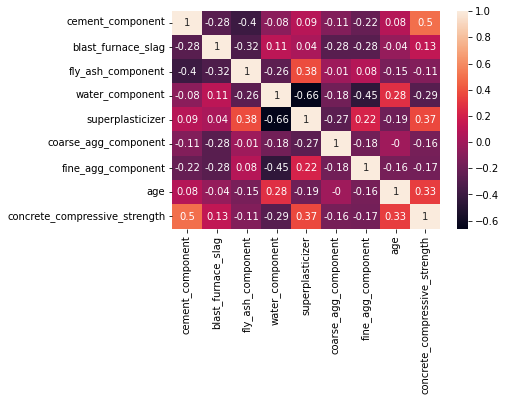

In [150]:
sb.heatmap(data=correlation_matrix, annot=True)

Thus, we see that the 'cement_component' feature is contributing the most towards the output variable 'concrete_compressive_strength'.

In [151]:
#Preprocessing the data set - checking null values
df.isnull().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

In [152]:
class LinearRegression():

  def __init__(self):
    pass


  def pre_processing(self, df):
      df = df.dropna()
      df = df.drop_duplicates()
      return df

  def split_X_and_y(self, df):
    no_rows, no_cols = df.shape[0], df.shape[1]
    X =  df.iloc[:, 0:(no_cols -1)]
    y = df.iloc[:, no_cols-1]

    return X,y

  def scale_data(self, df):
    ss = StandardScaler()
    return pd.DataFrame(ss.fit_transform(df), columns = df.columns)

  def split_train_test(self, X, y):
    return train_test_split(X, y, test_size = 0.2, random_state=5)

  def get_vectorX(self, X):
    return np.c_[np.ones((len(X),1)), X]

  def get_initial_weights(self, X):
    #return np.random.rand(X.shape[1] + 1, 1)
    return np.ones((X.shape[1] + 1, 1))

  def multivariate_gradient(self, X, y, thetha):
    return 1/len(X)*X.T.dot(X.dot(thetha) - y[0])

  def fit_with_grad_desc(self, X, y, epochs, rate):
      theta = self.get_initial_weights(X)
      vectorX = self.get_vectorX(X)
      vectorY = np.reshape(y.values,(-1,1))
      costs = []
      m = len(X)
      for i in range(epochs):
        gradient = self.multivariate_gradient(vectorX, vectorY, theta)
        #gradient = 2/m * vectorX.T.dot(vectorX.dot(theta) - y[0])
        print(theta)
        theta -= rate*gradient
        y_pred = vectorX.dot(theta)
        cost = 1/(2*m)*(vectorY - y_pred)**2
        costs.append(cost.sum())

      plt.plot(np.arange(1,epochs),costs[1:], color = 'red')
      plt.title('Cost function Graph')
      plt.xlabel('Number of iterations')
      plt.ylabel('Cost')
      return theta

      # n_sample = X.shape[0]  #number of samples
      # loss = np.ones(epochs)  #creating unit matrix 
      # ones = np.ones((n_sample,1))  
      # X = np.concatenate((ones, X), axis=1)   #Form the new X with old X and X0's as 1
      # attr = X.shape[1]   
      # theta = np.ones(attr)
      # hypo = np.dot(X, theta)   
      # for i in range (0, epochs):
      #   theta[0] = theta[0] - (rate / X.shape[0]) * sum(hypo-y) #for theta0,x0
      #   for j in range(1, attr):
      #     theta[j]= theta[j] - (rate/ X.shape[0]) * sum((hypo-y) * X[:, j])
      #   hypo= np.dot(X, theta)
      #   #Now computing loss
      #   loss[i]=1/(n_sample) * sum(np.square(hypo-y))


      # plt.plot(np.arange(1,epochs),loss[1:], color = 'red')
      # plt.title('Cost function Graph')
      # plt.xlabel('Number of iterations')
      # plt.ylabel('Cost')
      # return loss, theta


model = LinearRegression()

In [153]:
df = model.pre_processing(df)
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Here we do not have any categorical variables in the data, so we do not need to convert it.

In [154]:
X, y = model.split_X_and_y(df)

We would want to scale the data to normalize the deviations.

In [155]:
scaled_X = model.scale_data(X)
scaled_X.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age
0,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,0.846308,-1.204069,-0.280312
1,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,1.039755,-1.204069,-0.280312
2,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,3.518569
3,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,5.009865
4,-0.767348,0.700784,-0.865363,0.465334,-1.019442,0.051889,0.657702,4.931375


In [156]:
X_train, X_test, y_train, y_test = model.split_train_test(scaled_X, y)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (804, 8)
y_train shape:  (804,)
X_test shape:  (201, 8)
y_test shape:  (201,)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[4.56560084]
 [0.91458589]
 [1.03695596]
 [0.89625486]
 [1.04154555]
 [0.90195773]
 [0.98980744]
 [1.08758515]
 [0.91656101]]
[[7.7738861 ]
 [0.84644864]
 [1.06322391]
 [0.81064746]
 [1.07295513]
 [0.82132945]
 [0.98149334]
 [1.15999745]
 [0.83913865]]
[[10.66072916]
 [ 0.79284534]
 [ 1.08095443]
 [ 0.74025506]
 [ 1.09653146]
 [ 0.75491847]
 [ 0.97465175]
 [ 1.21886646]
 [ 0.76762551]]
[[13.25839428]
 [ 0.75141825]
 [ 1.09189463]
 [ 0.68265403]
 [ 1.11405288]
 [ 0.700138  ]
 [ 0.96895039]
 [ 1.26576075]
 [ 0.70180234]]
[[15.59590065]
 [ 0.72014605]
 [ 1.09746419]
 [ 0.63582489]
 [ 1.12689271]
 [ 0.65488787]
 [ 0.9641186 ]
 [ 1.30215766]
 [ 0.64137999]]
[[17.69934959]
 [ 0.69730043]
 [ 1.09881656]
 [ 0.59807736]
 [ 1.13611127]
 [ 0.61745748]
 [ 0.95993724]
 [ 1.32942584]
 [ 0.58602951]]
[[19.59221865]
 [ 0.68140755]
 [ 1.0968884 ]
 [ 0.56799073]
 [ 1.14252699]
 [ 0.58644931]
 [ 0.95623006]
 [ 1.34881679]
 [ 0.5354036 ]]
[[21.295625

array([[3.66406845e+01],
       [2.90485278e-01],
       [2.77609477e-01],
       [2.42837037e-01],
       [2.56952673e-01],
       [3.59977760e-02],
       [2.21625935e-01],
       [2.78731733e-01],
       [5.73900217e-03]])

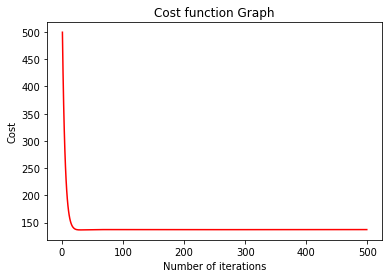

In [157]:
model.fit_with_grad_desc(X_train, y_train, 500, 0.1)